In [48]:
import pandas as pd

In [49]:
data_frame = pd.read_csv("adult.csv")

In [50]:
data_frame.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [51]:
data_frame.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [52]:
data_frame.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [53]:
data_frame = pd.concat([data_frame.drop("occupation", axis=1), pd.get_dummies(data_frame.occupation).add_prefix("occupation_")], axis=1)
data_frame = pd.concat([data_frame.drop("workclass", axis=1), pd.get_dummies(data_frame.workclass).add_prefix("workclass_")], axis=1)
data_frame = data_frame.drop("education", axis=1)
data_frame = pd.concat([data_frame.drop("marital-status", axis=1), pd.get_dummies(data_frame["marital-status"]).add_prefix("marital-status_")], axis=1)
data_frame = pd.concat([data_frame.drop("relationship", axis=1), pd.get_dummies(data_frame.relationship).add_prefix("relationship_")], axis=1)
data_frame = pd.concat([data_frame.drop("race", axis=1), pd.get_dummies(data_frame.race).add_prefix("race_")], axis=1)
data_frame = pd.concat([data_frame.drop("native-country", axis=1), pd.get_dummies(data_frame["native-country"]).add_prefix("native-country_")], axis=1)

In [54]:
data_frame

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [55]:
data_frame["gender"] = data_frame["gender"].apply(lambda x: 1 if x == "Male" else 0)
data_frame["income"] = data_frame["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [56]:
data_frame["income"]

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

<Axes: >

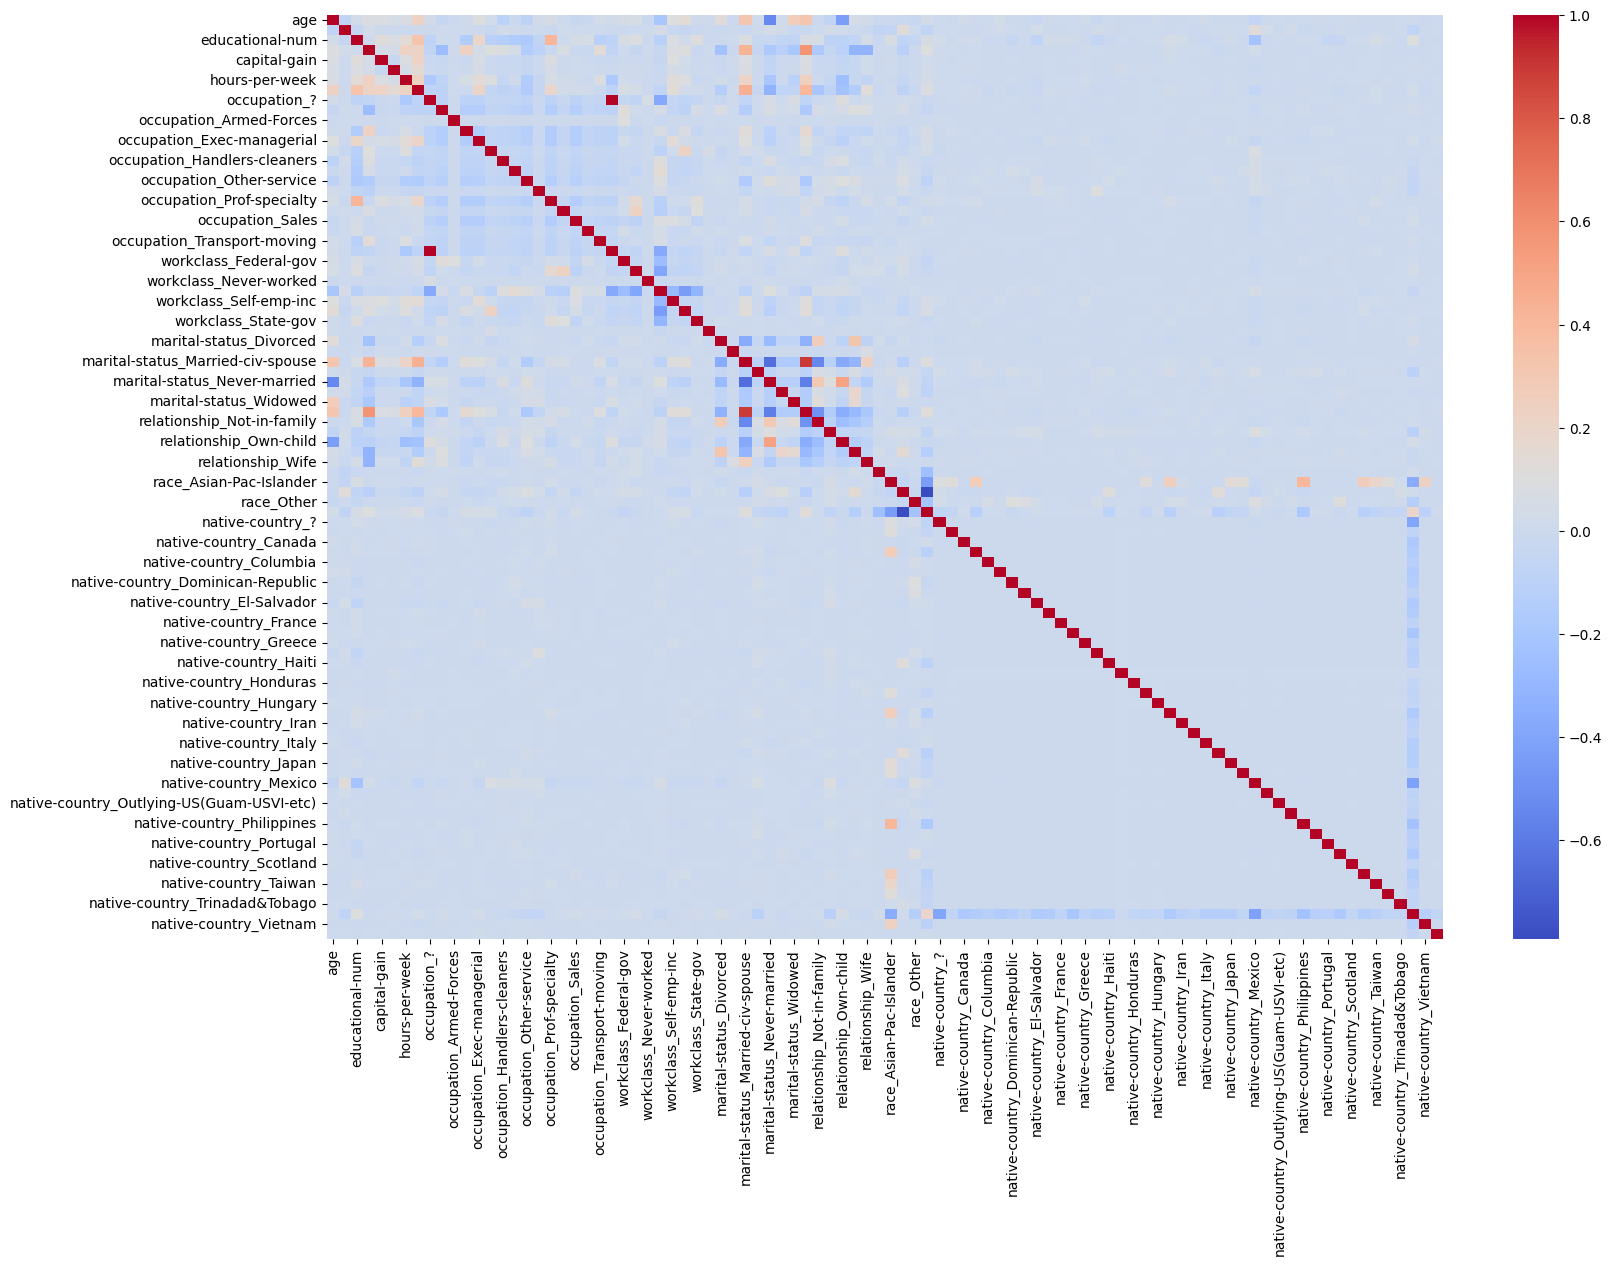

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(data_frame.corr(), annot=False, cmap="coolwarm")

In [58]:
correlations = data_frame.corr()["income"].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(data_frame.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
data_frame_dropped = data_frame.drop(cols_to_drop, axis=1)

In [59]:
data_frame_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

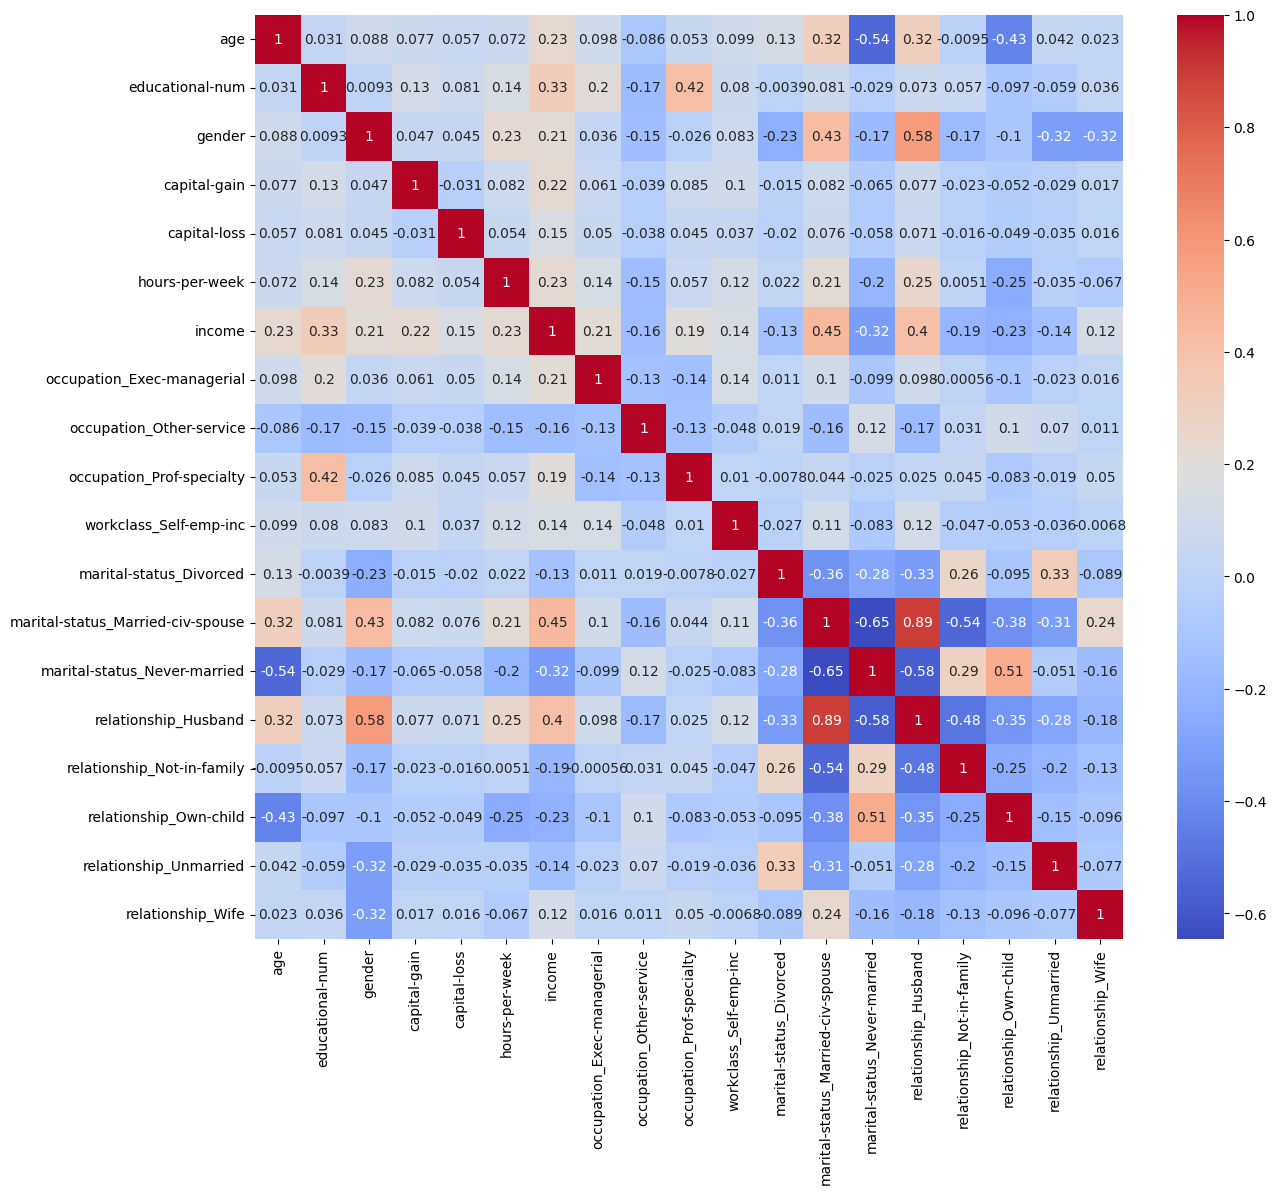

In [64]:
plt.figure(figsize=(14, 12))
sns.heatmap(data_frame_dropped.corr(), annot=True, cmap="coolwarm")

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_data_frame, test_data_frame = train_test_split(data_frame, test_size=0.2)

In [66]:
train_data_frame

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
16549,33,185480,13,0,0,0,45,0,False,False,...,False,False,False,False,False,False,False,True,False,False
5675,27,538193,7,0,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
31614,19,225294,9,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
27171,23,289982,9,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
31089,48,345006,13,0,0,0,45,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914,33,66384,9,1,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
40898,36,28996,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
37066,45,99385,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,False,False,False
44828,28,156300,14,0,0,0,45,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [67]:
test_data_frame

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
37000,20,210781,10,0,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False
14262,39,126569,13,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
19924,31,33308,11,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
664,65,190454,7,1,0,0,29,0,True,False,...,False,False,False,False,False,False,False,True,False,False
19785,31,120461,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27929,42,115932,13,1,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
45194,46,51271,9,1,4386,0,70,0,False,False,...,False,False,False,False,False,False,False,True,False,False
29649,27,660870,13,0,0,0,60,0,False,False,...,False,False,False,False,False,False,False,True,False,False
15938,20,267706,9,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
